<a href="https://colab.research.google.com/github/Kaavyyaaaa/Facial-Recognition-/blob/main/1_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive


 1stYrFinalResult.pdf
 2022041033_10Class.pdf
 2022041033_12Class.pdf
 2022041033_Aadhaar.pdf
 2022041033_IDCard.pdf
 2022041033_PrevSem.pdf
 3rdYearResult.jpg
'Books '
 Certificates
'class 10.pdf'
'Colab Notebooks'
'Computer Fundamentals '
'Copy of Sherlocked: ROUND 1 Result List.gsheet'
 Documents
'Facial Expression Recognition'
'Facial Expression Recognition (1)'
 facial_model_best.h5
 facial_model_final.keras
 facial_model.keras
 facial_model_partial.h5
 IMG-20240319-WA0011.jpg
'Introduction to Internet of Things (1).pdf'
'IoT NPTEL CERTI.pdf'
 JMD
'kav ResumeNew.pdf'
'Kavya Resume 2024 (1).pdf'
"kavya's resume'24.pdf"
"kavya's Resume Final'24.pdf"
"k'sResume.pdf"
'ML Project'
'Resume '
 resumeNew.pdf
 resume.pdf
'Secret diary.pdf'
'Secret diry of barbies.  (1).pdf'
'Secret diry of barbies. .pdf'
 Uni_ID_Back.jpg
 Uni_ID.jpg


In [3]:
import os

#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, UnidentifiedImageError

import tensorflow as tf
tf.config.run_functions_eagerly(True)
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


In [4]:
print("Eager execution:", tf.executing_eagerly())


Eager execution: True


In [5]:
#Defining dataset path.

train_path = '/content/drive/MyDrive/Facial Expression Recognition/train'
test_path = '/content/drive/MyDrive/Facial Expression Recognition/test'

print("Train folders:", os.listdir(train_path))
print("Test folders:", os.listdir(test_path))



Train folders: ['neutral', 'angry', 'disgust', 'sad', 'fear', 'surprise', 'happy']
Test folders: ['sad', 'neutral', 'surprise', 'happy', 'angry', 'fear', 'disgust']


In [6]:
 # 5. Load the previously saved model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/facial_model_best.h5')
print("✅ Model loaded successfully!")


✅ Model loaded successfully!


In [7]:
# Cleaning corrupted images.

def verify_and_clean_images(folder_path):
    bad_files = []
    total = 0

    for emotion in os.listdir(folder_path):
        emotion_folder = os.path.join(folder_path, emotion)
        if not os.path.isdir(emotion_folder):
            continue
        for img_file in os.listdir(emotion_folder):
            img_path = os.path.join(emotion_folder, img_file)
            try:
               with Image.open(img_path) as img:
                    img.load()  # deeper check than img.verify()
            except (UnidentifiedImageError, OSError, Exception) as e:
                bad_files.append(img_path)
            total += 1


    print(f"Total images scanned in '{folder_path}': {total}")
    print(f"Corrupted images found: {len(bad_files)}")

    for path in bad_files:
        try:
            os.remove(path)
            print(f"Removed: {path}")
        except Exception as e:
            print(f"Failed to remove {path}: {e}")

# Running the cleaning for both folders
verify_and_clean_images('/content/drive/MyDrive/Facial Expression Recognition/train')
verify_and_clean_images('/content/drive/MyDrive/Facial Expression Recognition/test')




Total images scanned in '/content/drive/MyDrive/Facial Expression Recognition/train': 28606
Corrupted images found: 0
Total images scanned in '/content/drive/MyDrive/Facial Expression Recognition/test': 6392
Corrupted images found: 0


In [8]:
# ImageDataGenerators + Augmentation

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(48, 48),
    batch_size=32,
    color_mode='grayscale',
    class_mode='categorical',
    shuffle=False
)


Found 28605 images belonging to 7 classes.
Found 6391 images belonging to 7 classes.


In [9]:
# Defining CNN Model

model = Sequential([
    Input(shape=(48, 48, 1)),

    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # For 7 classes
])

# Compiling CNN Model

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 355,847 (1.36 MB)

 Trainable params: 355,847 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    '/content/drive/MyDrive/facial_model_best.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


#EPOCHS = 30

history = model.fit(
    train_generator,
    validation_data=test_generator,
    #steps_per_epoch=200,
    #validation_steps=50,
    epochs=10,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

# Always run .compile() after .load_model() if you plan to train further.


Epoch 1/10


ValueError: Unknown variable: <Variable path=sequential/conv2d/kernel, shape=(3, 3, 1, 32), dtype=float32, value=[[[[-0.13629898  0.04609359  0.12518711  0.04762812  0.07753334
    -0.0362771   0.02625433  0.18345569 -0.14146045  0.03603404
     0.20120576 -0.2698738   0.07687901 -0.13885579 -0.1517467
    -0.07420717  0.02417254  0.03237912  0.2295283  -0.12916097
    -0.16307539  0.05977834  0.16783687  0.08675832 -0.08541072
     0.02140181 -0.1555197   0.12385364  0.09775955 -0.13566351
    -0.14523967  0.20347053]]

  [[-0.09714144 -0.08283945  0.18350352  0.0922075  -0.1372989
    -0.1303739  -0.08749548  0.18578446  0.15613604 -0.07026586
     0.06873945 -0.21500207 -0.01166192 -0.05573638 -0.21869808
    -0.18479984  0.16674456  0.0017416  -0.11953311 -0.14409447
     0.09384073 -0.13113336  0.04769725  0.05891141 -0.00911929
     0.20699812  0.12179035 -0.1705003  -0.04919329 -0.0087638
    -0.03928604  0.22452693]]

  [[-0.29110345 -0.23310615  0.22626159 -0.00979899 -0.11437232
     0.18058868  0.01188485 -0.0398136   0.15789384 -0.03279845
     0.17068592  0.18818837 -0.18956941  0.00815644  0.00987431
    -0.07173549  0.179904   -0.07409253 -0.11240675 -0.18603161
     0.03530901  0.09836896 -0.03849115  0.19437033 -0.13023975
     0.19322304  0.14733072 -0.11272755 -0.04911291 -0.06091126
    -0.27883157  0.04546741]]]


 [[[ 0.09521621  0.19226325 -0.23156038 -0.1052289   0.1486423
    -0.12766343 -0.06732095  0.19155498 -0.17100969 -0.02685186
     0.08546212 -0.11211922 -0.06242961  0.07606241  0.10598059
    -0.17831144 -0.2075452  -0.15537184  0.2741196   0.05247363
    -0.04859218 -0.07180666  0.2136649  -0.19685982 -0.19316244
    -0.09126185 -0.154758    0.02176302 -0.07767722 -0.15127449
    -0.16716474  0.10850668]]

  [[ 0.0168624  -0.03396668 -0.1011667  -0.07859133  0.0247343
    -0.13253199 -0.13542591 -0.02663683 -0.02752306 -0.0295136
     0.09269428  0.11380856 -0.03512463 -0.09399452 -0.26400605
     0.00234338 -0.2596927  -0.08926702 -0.12290062 -0.080432
     0.11058971 -0.01293244  0.02699031 -0.2617251  -0.14833939
    -0.1355221  -0.11693498  0.05733666 -0.01086035  0.06176643
     0.13246387 -0.00236922]]

  [[-0.13230982 -0.2875693  -0.05409842 -0.1104847  -0.03966262
     0.14547618  0.09577017 -0.23912615  0.21007018 -0.13529173
     0.09455325  0.19350055 -0.10290193 -0.00216763  0.02506627
     0.13246658 -0.23729455  0.07306192 -0.20958264 -0.08677822
     0.10011669 -0.02661175 -0.18761927 -0.11207357 -0.03569946
    -0.11066227  0.26172155  0.10362934  0.03287363 -0.08252849
    -0.04786011 -0.21348926]]]


 [[[ 0.15282775  0.18782406  0.01787121 -0.14079842  0.14500543
    -0.16406475  0.07860059 -0.04384615 -0.18832132 -0.0082027
    -0.28623718 -0.05218767 -0.17771687 -0.14043446  0.10401396
    -0.05832246  0.18175349  0.05554673  0.21795984 -0.00129035
     0.0308006   0.07535777  0.08549683 -0.23823799 -0.00673696
     0.13985352 -0.11593726 -0.09522336 -0.11489793 -0.0009711
     0.22948846  0.03654867]]

  [[ 0.20617166  0.12130061 -0.08640084 -0.05073773  0.11982151
    -0.05485012 -0.01663726 -0.21536727 -0.1283192  -0.09509517
    -0.18740854  0.1606508   0.02966283 -0.06617234 -0.12797682
     0.04723397  0.15245217 -0.12809809 -0.09323604  0.24314861
    -0.01969827 -0.02149006 -0.18915902 -0.13402116  0.05985218
    -0.18931551 -0.19569819 -0.21860191  0.10340705 -0.16724628
     0.23496498 -0.25536948]]

  [[ 0.1650494  -0.09868698 -0.06779617  0.00563561 -0.11387531
     0.27778345  0.05176957 -0.0681678   0.11072418 -0.1050863
    -0.24425377  0.0835164  -0.21991388 -0.09760563  0.0775342
     0.17442675 -0.02790124 -0.00851732 -0.10158421  0.27941483
     0.07827615 -0.14650111 -0.19950211 -0.06454629  0.18700176
    -0.21851383  0.05465361  0.2595265  -0.04650015 -0.12892203
     0.08714553 -0.09435256]]]]>. This optimizer can only be called for the variables it was originally built with. When working with a new set of variables, you should recreate a new optimizer instance.

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/facial_model_best.h5')


In [ ]:
model.save('/content/drive/MyDrive/facial_model_final.keras')


In [ ]:
print("Training samples:", train_generator.n)
print("Testing samples:", test_generator.n)


In [ ]:
loss, acc = model.evaluate(test_generator)
print(f"Test accuracy: {acc:.2f}")


In [ ]:
model.save('/content/drive/MyDrive/facial_model_final.keras')


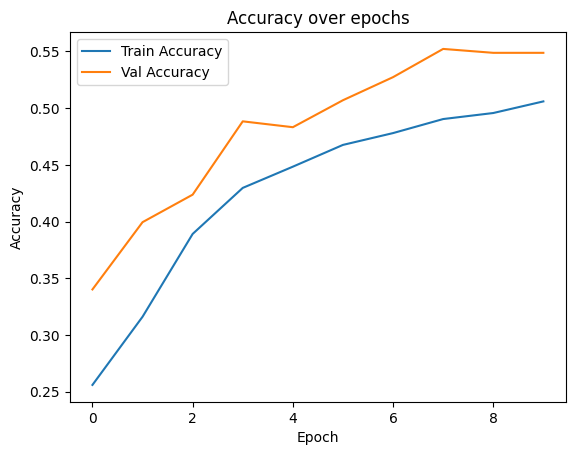

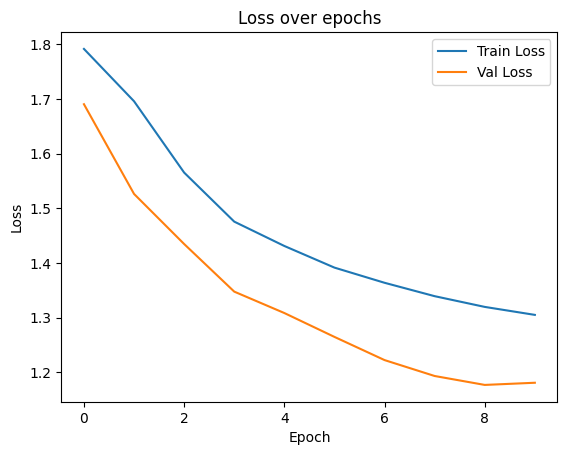

In [18]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


200/200 ━━━━━━━━━━━━━━━━━━━━ 34s 166ms/step


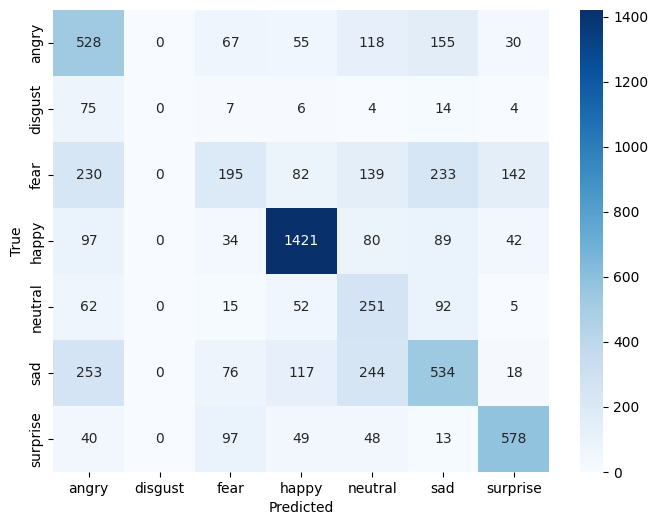

              precision    recall  f1-score   support

       angry       0.41      0.55      0.47       953
     disgust       0.00      0.00      0.00       110
        fear       0.40      0.19      0.26      1021
       happy       0.80      0.81      0.80      1763
     neutral       0.28      0.53      0.37       477
         sad       0.47      0.43      0.45      1242
    surprise       0.71      0.70      0.70       825

    accuracy                           0.55      6391
   macro avg       0.44      0.46      0.44      6391
weighted avg       0.55      0.55      0.54      6391



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns

# Predict
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Classification report
print(classification_report(y_true, y_pred_classes, target_names=class_labels))


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Path to your test image
img_path = '/content/drive/MyDrive/test_image.jpg'

# Load image in grayscale (same as training)
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')

# Convert to array
img_array = image.img_to_array(img)

# Add batch dimension
img_array_expanded = np.expand_dims(img_array, axis=0)

# Normalize pixel values
img_array_expanded /= 255.0

# Class labels
class_labels = list(train_generator.class_indices.keys())

# Prediction
pred = model.predict(img_array_expanded)
predicted_class = class_labels[np.argmax(pred)]
confidence = np.max(pred) * 100

# Show result
plt.imshow(img_array.squeeze(), cmap='gray')
plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
plt.axis('off')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/test_image.jpg'